#### <u>Problem Statements: </u>

* Which types of complaints are more ?
* Which Month the complaints are more ?
* What time the complaints are more ?
* How customers are registering complaints ?
* Which city has highest complaints and which city has lowest ?
* which state has highest and lowest complaints ?
* what is the average time taking to resolve the complaints ?
* what percent of cityzens are filling complaints by their own ?  
      
      

    

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [24]:
date_time=[['Date','Time']]

In [36]:
df=pd.read_csv(r"D:\Projects\Comcast\Comcast.csv")

In [37]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.shape

(2224, 11)

In [38]:
# Data types in the features

df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [6]:
# Value counts of the dataset 

for feature in df.columns:
    dataset=df.copy()
    print(dataset[feature].value_counts())
    print('______________________________')
    print('******************************')

Ticket #
250635    1
359697    1
358592    1
363610    1
370168    1
272794    1
217985    1
357126    1
226150    1
294812    1
300869    1
359803    1
346047    1
246213    1
225791    1
296660    1
350931    1
350252    1
337209    1
224605    1
224932    1
371075    1
367256    1
329737    1
284592    1
224243    1
330392    1
360680    1
250828    1
305229    1
319428    1
222212    1
365565    1
335204    1
358836    1
363044    1
339017    1
362807    1
362820    1
360349    1
298618    1
315865    1
214079    1
341442    1
345351    1
354431    1
356720    1
215830    1
360771    1
243166    1
309754    1
226539    1
300119    1
339241    1
243742    1
214664    1
335844    1
360595    1
326788    1
301499    1
251802    1
244230    1
358707    1
358772    1
371160    1
359239    1
293051    1
251736    1
295447    1
360338    1
223441    1
212595    1
260134    1
212228    1
358644    1
337000    1
360928    1
267727    1
218108    1
370575    1
234888    1
353376    1
337050 

In [39]:
df['Customer Complaint']=df['Customer Complaint'].str.lower().str.capitalize()

In [41]:
df['Customer Complaint'].value_counts().head()

Customer Complaint
Comcast              102
Comcast data cap      30
Comcast internet      29
Comcast data caps     21
Comcast billing       18
Name: count, dtype: int64

In [47]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])

C:\Users\pc\AppData\Local\Temp\ipykernel_16540\3390916950.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_month_year']=pd.to_datetime(df['Date_month_year'])


In [49]:
df['Day']=df['Date_month_year'].dt.day

In [51]:
df['Month']=df['Date_month_year'].dt.month

In [53]:
df['Year']=df['Date_month_year'].dt.year

In [59]:
df['logged_time']= pd.to_datetime(df['Time']).dt.time

C:\Users\pc\AppData\Local\Temp\ipykernel_16540\2443208772.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['logged_time']= pd.to_datetime(df['Time']).dt.time


In [62]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year,logged_time
0,250635,Comcast cable internet speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,10:22:56
2,242732,Speed and service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,09:55:47
3,277946,Comcast imposed a new usage cap of 300gb that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,13:25:26


In [63]:
# Removing features which are not relevant for this analysis 

col_to_remove=['Ticket #','Date_month_year','Time']

dataset=df.copy()
dataset.drop(col_to_remove,axis=1,inplace=True)

In [65]:
dataset.head()

,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year,logged_time
0,Comcast cable internet speeds,22-04-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,15:53:50
1,Payment disappear - service got disconnected,04-08-15,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,10:22:56
2,Speed and service,18-04-15,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,09:55:47
3,Comcast imposed a new usage cap of 300gb that ...,05-07-15,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,11:59:35
4,Comcast not working and no service to boot,26-05-15,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,13:25:26


In [67]:
df['Status'].value_counts()

Status
Solved     973
Closed     734
Open       363
Pending    154
Name: count, dtype: int64

In [74]:
New_Status= []
for i in df['Status']:
    if i=='Solved' or i=='Closed':
        i='Resolved'
        New_Status.append(i)
    else:
        i='Open'
        New_Status.append(i)
df['New Status']=New_Status

In [75]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year,logged_time,New Status
0,250635,Comcast cable internet speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,15:53:50,Resolved
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,10:22:56,Resolved
2,242732,Speed and service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,09:55:47,Resolved
3,277946,Comcast imposed a new usage cap of 300gb that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,11:59:35,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,13:25:26,Resolved


#### Day wise Complaints

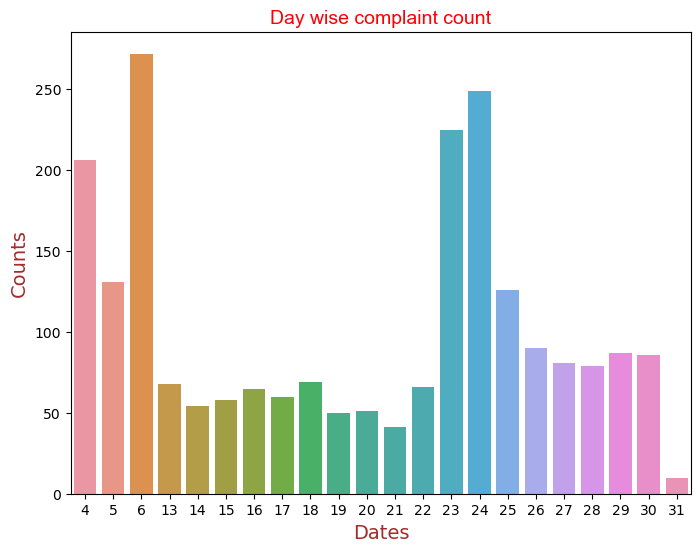

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Day'].value_counts().index,y=df['Day'].value_counts().values)
plt.title('Day wise complaint count',font='arial',fontsize=14,color='Red')
plt.xlabel('Dates',fontsize=14,color='Brown')
plt.ylabel('Counts',fontsize=14,color='Brown')
plt.show()

In [91]:
# Monthly Complaints

df['Month'].value_counts()

Month
6     1046
4      375
5      317
8       67
12      65
2       59
1       55
9       55
10      53
7       49
3       45
11      38
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(x=df['Month'].value_counts().index,y=df['Month'].value_counts().values)
plt.title('Monthly wise complaints',fontsize=14,color='Red')
plt.xlabel('Months',fontsize=14,color='Brown')
plt.ylable('Counts',fontsize=14,color=Brown)
plt.show()